In [1]:
######## import all necessity functions ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, silhouette_score

In [2]:
######## Import all Functions ########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, LeakyReLU, ELU, PReLU
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import sigmoid, tanh, softmax
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, Huber, MSE
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L2, L1, l1_l2

In [3]:
###### import the dataset #######
df = pd.read_csv('/content/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
###### print number of row and columns of this dataset ######
print("# of rows of this dataset is = ", df.shape[0],'\n')
print("# of column of this data is  = ", df.shape[1])

# of rows of this dataset is =  178 

# of column of this data is  =  13


In [5]:
###### Check missing value present or not #######
df.isnull().sum().sum()

0

In [6]:
##### print the decribe of this dataset #####
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
###### print the info of this dataset ######
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


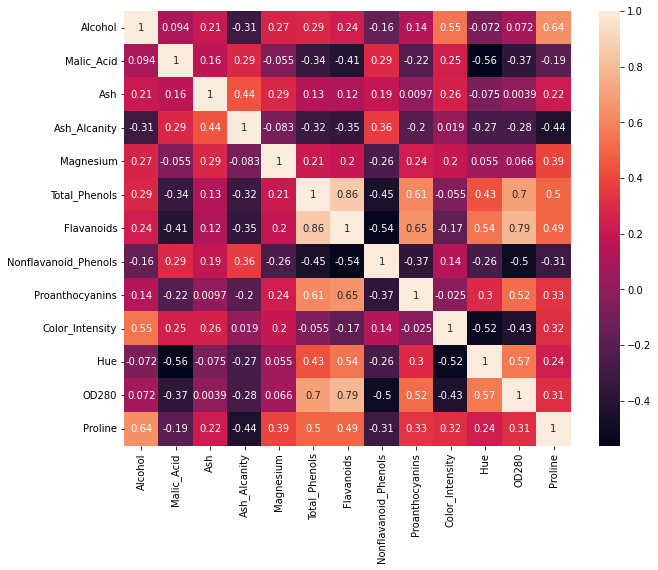

In [8]:
###### find the correlation of this dataset ######
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

In [9]:
###### Find the feature importance using pearson correlation technique ######
def correlation(dataset, threshold_):
    col_corr_ = set()
    corr_matrix_ = dataset.corr()
    ###### Run a Loop ######
    for i in range(len(corr_matrix_.columns)):
        for j in range(i):
            if abs(corr_matrix_.iloc[i, j] > threshold_):
                colname_ = corr_matrix_.columns[i]
                col_corr_.add(colname_)
    return col_corr_

In [10]:
pearson_ = correlation(df, 0.85)
print(f"{pearson_} column is not so important using pearson correlation matrix.")
df.drop(list(pearson_), axis = 1, inplace = True)
df.head()

{'Flavanoids'} column is not so important using pearson correlation matrix.


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


column name is  Alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


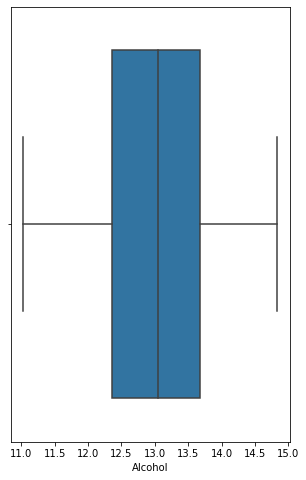

column name is  Malic_Acid


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


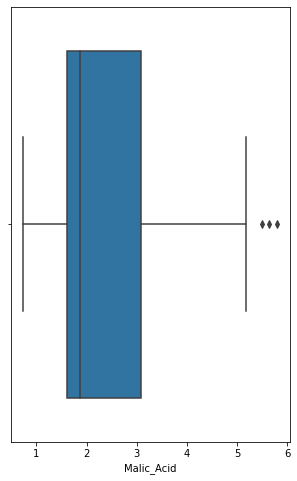

column name is  Ash


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


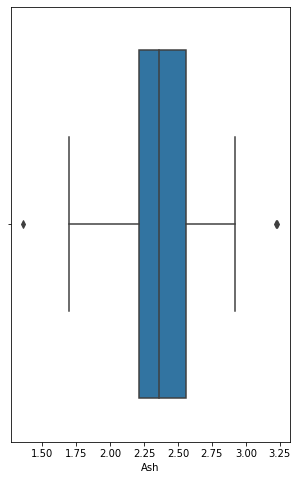

column name is  Ash_Alcanity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


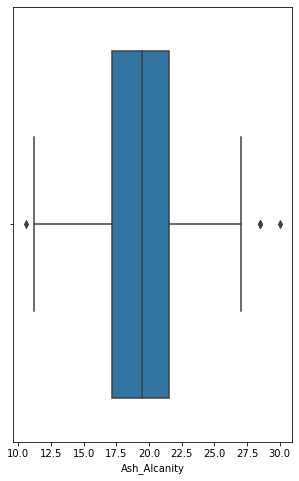

column name is  Magnesium


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


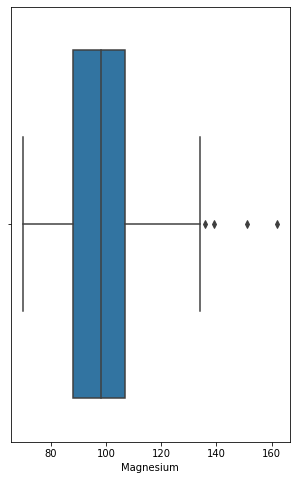

column name is  Total_Phenols


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


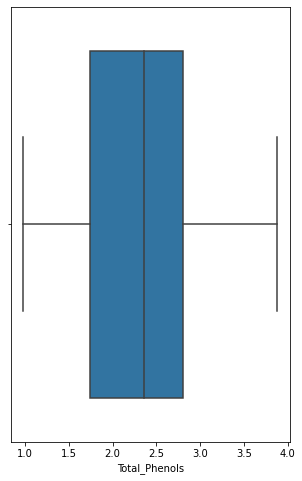

column name is  Nonflavanoid_Phenols


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


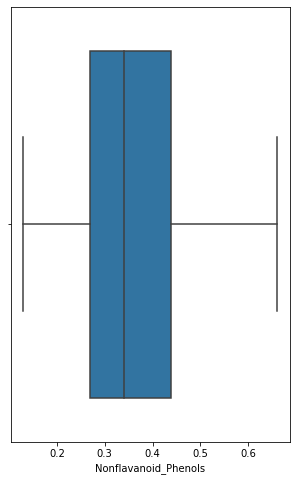

column name is  Proanthocyanins


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


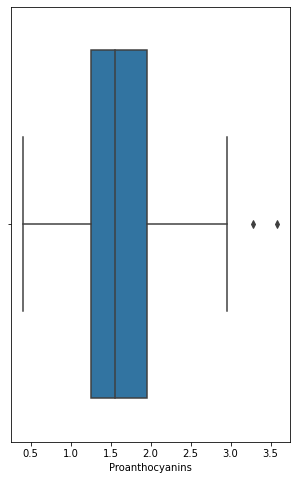

column name is  Color_Intensity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


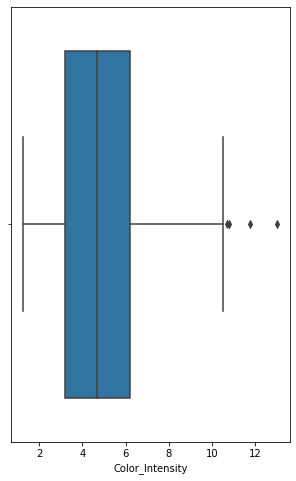

column name is  Hue


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


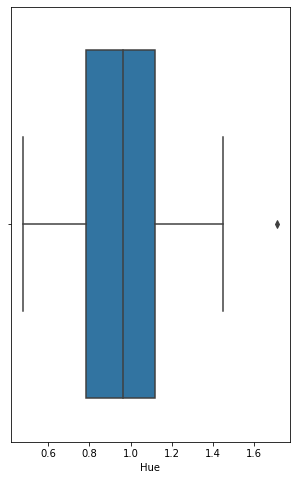

column name is  OD280


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


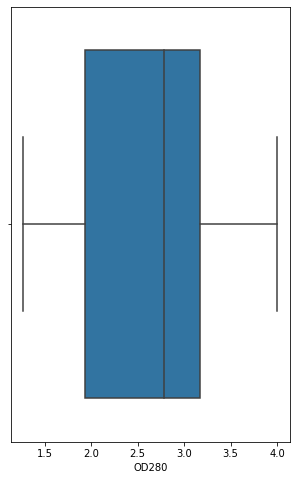

column name is  Proline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


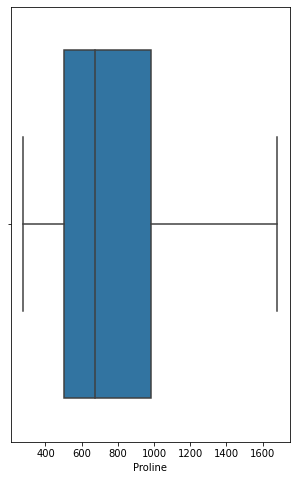

In [11]:
###### Check outliers present or not ######
for column_ in df.columns:
  plt.figure(figsize = (5, 8))
  print("column name is ", column_)
  sns.boxplot(df.loc[:, column_])
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


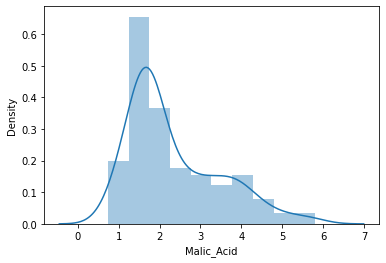

In [12]:
sns.distplot(df.loc[:, 'Malic_Acid'])
plt.show()

In [13]:
def leftSkew(feature_):
  percentile_75 = df.loc[:, feature_].quantile(0.75)
  percentile_25 = df.loc[:, feature_].quantile(0.75)
  IQR_ = percentile_75 - percentile_25
  upper_limit_ = IQR_ + 1.5*percentile_75
  lower_limit_ = IQR_ - 1.5*percentile_25
  ###### Capping used for removing the outliers ######
  df.loc[:, feature_] = np.where(df.loc[:, feature_] > upper_limit_,
          upper_limit_,
          np.where(df.loc[:, feature_] < lower_limit_,
                  lower_limit_,
                  df.loc[:, feature_]))
  print("Completed.")

Completed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


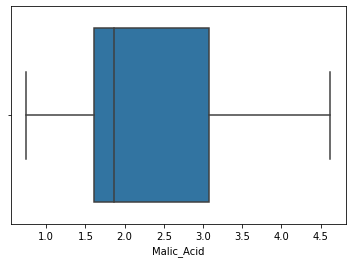

In [14]:
leftSkew('Malic_Acid')
sns.boxplot(df.loc[:, 'Malic_Acid'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


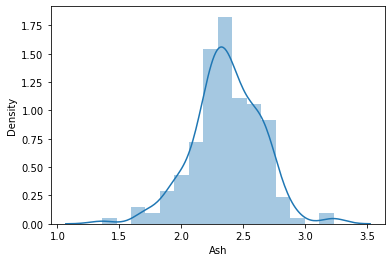

In [15]:
###### For Ash ######
sns.distplot(df.loc[:, 'Ash'])

In [16]:
def normalDistributed(feature_):
  upper_limit_ = df.loc[:, feature_].quantile(0.975)
  lower_limit_ = df.loc[:, feature_].quantile(1 - 0.975)
  ###### Capping used for removing the outliers ######
  df.loc[:, feature_] = np.where(df.loc[:, feature_] > upper_limit_,
                                upper_limit_,
                                np.where(df.loc[:, feature_] < lower_limit_,
                                          lower_limit_,
                                          df.loc[:, feature_]))
  print("Completed.")

Completed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


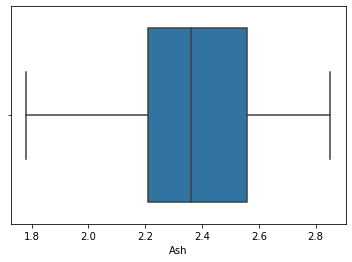

In [17]:
normalDistributed('Ash')
sns.boxplot(df.loc[:, 'Ash'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


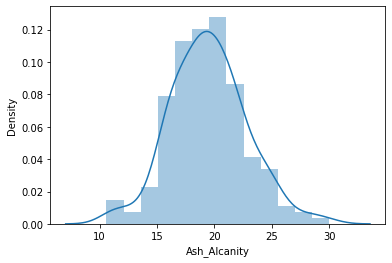

In [18]:
sns.distplot(df.loc[:, 'Ash_Alcanity'])
plt.show()

Completed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


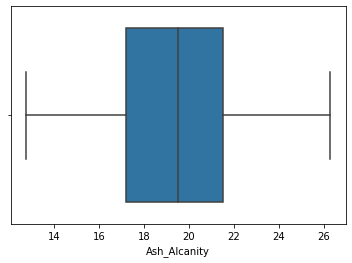

In [19]:
normalDistributed('Ash_Alcanity')
sns.boxplot(df.loc[:, 'Ash_Alcanity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


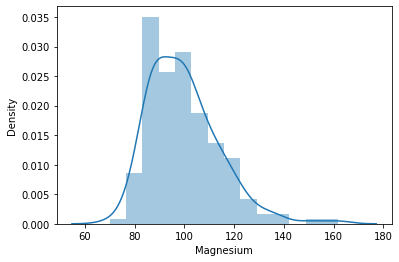

In [20]:
sns.distplot(df.loc[:, 'Magnesium'])
plt.show()


Completed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


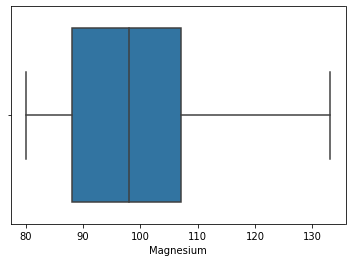

In [21]:
normalDistributed('Magnesium')
sns.boxplot(df.loc[:, 'Magnesium'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


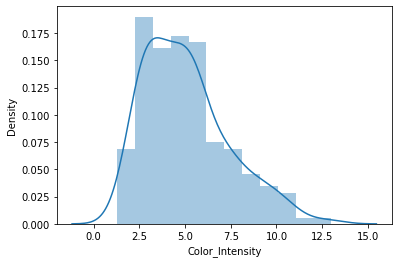

In [22]:
sns.distplot(df.loc[:, 'Color_Intensity'])
plt.show()

Completed.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


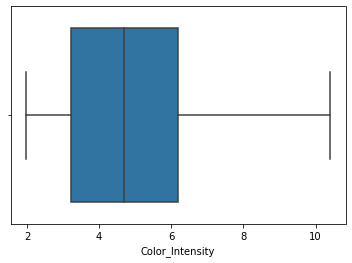

In [23]:
normalDistributed('Color_Intensity')
sns.boxplot(df.loc[:, 'Color_Intensity'])
plt.show()

In [24]:
####### Scaling the dataset #######
standardScaler_ = MinMaxScaler()
X = standardScaler_.fit_transform(df)
X = pd.DataFrame(X, columns = df.columns)
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.249759,0.606718,0.211109,0.884290,0.627586,0.283019,0.593060,0.434776,0.455285,0.970696,0.561341
1,0.571053,0.267782,0.336132,0.000000,0.376294,0.575862,0.245283,0.274448,0.285456,0.463415,0.780220,0.550642
2,0.560526,0.417123,0.830651,0.432552,0.395108,0.627586,0.320755,0.757098,0.439516,0.447154,0.695971,0.646933
3,0.878947,0.311555,0.672032,0.299686,0.620884,0.989655,0.207547,0.558360,0.690753,0.308943,0.798535,0.857347
4,0.581579,0.476344,1.000000,0.609707,0.714958,0.627586,0.490566,0.444795,0.278346,0.455285,0.608059,0.325963


In [25]:
###### PCA Apply ######
PCA_ = PCA()
PCA_.fit_transform(X)

array([[-0.72472187, -0.43249513,  0.05773083, ..., -0.08507675,
         0.16076923, -0.10070779],
       [-0.54181934,  0.03296683, -0.35334518, ..., -0.0980944 ,
        -0.02705487, -0.02121641],
       [-0.39421777, -0.29586139,  0.21893444, ..., -0.07136047,
         0.12451201, -0.04393729],
       ...,
       [ 0.63534827, -0.68216761, -0.24865072, ..., -0.11136316,
        -0.12339712, -0.1071045 ],
       [ 0.49949429, -0.54603345, -0.15760574, ..., -0.1479219 ,
         0.01206012, -0.01981231],
       [ 0.836363  , -0.58333355,  0.18800355, ...,  0.14232084,
         0.01279512,  0.0015416 ]])

In [26]:
np.cumsum(PCA_.explained_variance_ratio_)

array([0.3193823 , 0.54536048, 0.65863371, 0.74041318, 0.81099908,
       0.86206236, 0.90244673, 0.926188  , 0.94941391, 0.96793991,
       0.98477619, 1.        ])

PCA apply for n_components = 8

In [27]:
###### PCA Apply ######
PCA_ = PCA(n_components = 6)
X = PCA_.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-0.724722,-0.432495,0.057731,0.020895,0.161039,-0.126840
1,-0.541819,0.032967,-0.353345,0.074414,0.004580,-0.197038
2,-0.394218,-0.295861,0.218934,0.115096,-0.147427,0.069148
3,-0.707959,-0.720003,-0.008733,0.103869,-0.136413,0.112379
4,-0.122966,-0.252544,0.527786,-0.028956,0.088784,-0.128674


KMeans Clustering Use in this dataset

In [28]:
wcss_ = []
for n_cluster_ in range(2, 10):
  KMeans_ = KMeans(n_clusters = n_cluster_, max_iter = 1500)
  KMeans_.fit_predict(X)
  print(f"cluster {n_cluster_} used, score is = {silhouette_score(X.values, KMeans_.labels_)}")

cluster 2 used, score is = 0.29449566920998377
cluster 3 used, score is = 0.3313284420325148
cluster 4 used, score is = 0.31051073569745574
cluster 5 used, score is = 0.2808457877761423
cluster 6 used, score is = 0.25176399485669315
cluster 7 used, score is = 0.2165103598513916
cluster 8 used, score is = 0.20993176207792655
cluster 9 used, score is = 0.19897008510931768


Agglomerative Clustering Used in this dataset

In [29]:
wcss_ = []
for n_cluster_ in range(2, 10):
  agglomerative_ = AgglomerativeClustering(n_clusters = n_cluster_)
  agglomerative_.fit_predict(X)
  print(f"cluster {n_cluster_} used, score is = {silhouette_score(X.values, agglomerative_.labels_)}")

cluster 2 used, score is = 0.2984398102744977
cluster 3 used, score is = 0.32735636856301287
cluster 4 used, score is = 0.271586184714191
cluster 5 used, score is = 0.22678792579195398
cluster 6 used, score is = 0.2345162215021126
cluster 7 used, score is = 0.2444105551304356
cluster 8 used, score is = 0.1946660037388852
cluster 9 used, score is = 0.21096861593192776


Cluster used = 3 


In [30]:
KMeans_ = KMeans(n_clusters = 3)
KMeans_.fit_predict(X)
y = KMeans_.labels_
y = pd.DataFrame(y, columns = ['Targer'])
y.value_counts()

Targer
1         66
0         63
2         49
dtype: int64

In [31]:
df = pd.concat([X, y], axis = 1)
df.head()

,0,1,2,3,4,5,Targer
0,-0.724722,-0.432495,0.057731,0.020895,0.161039,-0.126840,0
1,-0.541819,0.032967,-0.353345,0.074414,0.004580,-0.197038,0
2,-0.394218,-0.295861,0.218934,0.115096,-0.147427,0.069148,0
3,-0.707959,-0.720003,-0.008733,0.103869,-0.136413,0.112379,0
4,-0.122966,-0.252544,0.527786,-0.028956,0.088784,-0.128674,0


In [32]:
###### Split the data into X and y #######
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
###### Train and test Split #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 42)

Using Neural Network to predict the model

In [33]:
####### Create the model ########
model = Sequential()
####### Create input layer #######
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
####### Use the Dropout Layer #######
model.add(Dropout(0.5))
####### Create first hidden #######
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))
####### Use the Dropout Layer #######
model.add(Dropout(0.6))

####### Create an output layer #######
model.add(Dense(units = 3, activation = 'softmax'))

####### Compile the model ########
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

####### fit the model and run ########
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 32, verbose = 1)

Epoch 1/200
5/5 [==============================] - 3s 157ms/step - loss: 1.3213 - accuracy: 0.3291 - val_loss: 1.1169 - val_accuracy: 0.2000
Epoch 2/200
5/5 [==============================] - 0s 32ms/step - loss: 1.1359 - accuracy: 0.3987 - val_loss: 1.0277 - val_accuracy: 0.3500
Epoch 3/200
5/5 [==============================] - 0s 23ms/step - loss: 1.0521 - accuracy: 0.3924 - val_loss: 0.9516 - val_accuracy: 0.5500
Epoch 4/200
5/5 [==============================] - 0s 35ms/step - loss: 0.9527 - accuracy: 0.5063 - val_loss: 0.8812 - val_accuracy: 0.7000
Epoch 5/200
5/5 [==============================] - 0s 36ms/step - loss: 0.9237 - accuracy: 0.5886 - val_loss: 0.8175 - val_accuracy: 0.9000
Epoch 6/200
5/5 [==============================] - 0s 27ms/step - loss: 0.8402 - accuracy: 0.6266 - val_loss: 0.7575 - val_accuracy: 0.9000
Epoch 7/200
5/5 [==============================] - 0s 22ms/step - loss: 0.8643 - accuracy: 0.6013 - val_loss: 0.7023 - val_accuracy: 0.9000
Epoch 8/200
5/5 [==

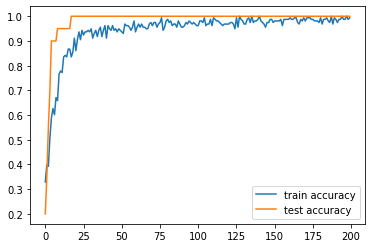

In [34]:
###### plot the accuracy and val_accuracy #######
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

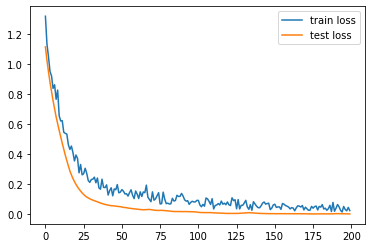

In [35]:
###### plot the loss and val_loss #######
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

Using KFold Cross Validation

In [36]:
kfold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_, accuracy_, recall_, precision_, f1_score_ = 0, [], [], [], []

for train_index, test_index in kfold_.split(X, y):
  print("Cross Validation # ", count_, '\n')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 64)
  y_pred = model.predict(X_test)
  predicted_ = np.argmax(y_pred, axis = 1)
  ###### print accuracy, reacll, precision and f1_score ########
  print("accuracy is   = ", accuracy_score(predicted_, y_test))
  print("recall is     = ", recall_score(predicted_, y_test, average = 'micro'))
  print("precision is  = ", precision_score(predicted_, y_test, average = 'micro'))
  print("f1 score is   = ", f1_score(predicted_, y_test, average = 'micro'))
  accuracy_.append(accuracy_score(predicted_, y_test))
  recall_.append(recall_score(predicted_, y_test, average = 'micro'))
  precision_.append(precision_score(predicted_, y_test, average = 'micro'))
  f1_score_.append(f1_score(predicted_, y_test, average = 'micro'))
  count_ = count_ + 1

Cross Validation #  0 

Epoch 1/200
3/3 [==============================] - 0s 46ms/step - loss: 0.0283 - accuracy: 0.9875 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0902 - accuracy: 0.9688 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0639 - accuracy: 0.9750 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0397 - accuracy: 0.9750 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0274 - accuracy: 0.9875 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0

In [37]:
print("accuracy score is  = ", np.array(accuracy_).mean())
print("reacll score is    = ", np.array(recall_).mean())
print("precision score is = ", np.array(precision_).mean())
print("f1_score score is  = ", np.array(f1_score_).mean())

accuracy score is  =  1.0
reacll score is    =  1.0
precision score is =  1.0
f1_score score is  =  1.0


Using Machine Learning using Stacking and Blending approach

In [38]:
from sklearn.naive_bayes import GaussianNB
estimators_ = [
    ('LogisticRegression_', LogisticRegression()),
    ('SGD_Classifier_', SGDClassifier()),
    ('Naive_Bayes_Classifier_', GaussianNB())
]
StackingClassifier_ = StackingClassifier(estimators = estimators_, final_estimator = SGDClassifier(), cv = 10)
StackingClassifier_.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('LogisticRegression_', LogisticRegression()),
                               ('SGD_Classifier_', SGDClassifier()),
                               ('Naive_Bayes_Classifier_', GaussianNB())],
                   final_estimator=SGDClassifier())

In [39]:
predicted_ = StackingClassifier_.predict(X_test)
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'micro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'micro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'micro'))

accuracy is   =  0.9411764705882353
recall is     =  0.9411764705882353
precision is  =  0.9411764705882353
f1 score is   =  0.9411764705882353
